In [77]:
# Import several libraries that we will use below
import numpy as np
import pandas as pd
import sklearn
import keras

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression , Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from keras import layers, Sequential
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Dense

In [78]:
import pandas as pd

# Load the dataset from the Excel file
# file_path = r"C:\Users\frm19\OneDrive - Wageningen University & Research\2. Thesis - Information Technology\7. Datasets\drl-minigreenhouse-datasets\compiled-real-and-measurements-datasets-cleaned.xlsx"
file_path = r"training.xlsx"
mgh_data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
mgh_data.head()

# Drop rows with missing values
# mgh_data = mgh_data.dropna()

# Length of dataset
num_rows = len(mgh_data)
print(f'Number of rows: {num_rows}')



Number of rows: 17280


In [60]:
# Inspect the dataset
mgh_data.head(5)

,time,co2 in - sim,co2 in - real,temperature in - sim,temperature in - real,rh in - sim,rh in - real,par in - sim,par in - real,time - 2,Unnamed: 10,Unnamed: 11
0,20,395.054803,400.0,20.203483,22.15,75.632258,51.05,3.743976,1.354850,1.0,2024-07-25 00:00:00,1 hr
1,25,394.864415,400.0,20.291022,23.35,78.012618,48.05,3.743976,1.331150,2.0,NaN,NaN
2,30,394.593620,400.0,20.298158,24.15,80.518579,46.05,3.743976,1.323250,3.0,NaN,NaN
3,35,396.130565,400.0,20.103906,24.60,77.168750,44.55,0.000000,0.439635,4.0,NaN,NaN
4,40,397.260265,400.0,20.017797,24.80,78.651062,43.80,0.000000,0.000000,5.0,NaN,NaN


In [61]:
# Select features and target variable
X = mgh_data[['time', 'co2 in - sim', 'rh in - sim', 'temperature in - sim', 'par in - sim']]
y = mgh_data['rh in - real']

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Scale the dataset 
# Normalize the features
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

c:\Users\frm19\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
# Check the structure
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Compile the model
# Set things up
# set things up
model.compile(loss='mse', metrics=['mae', 'R2Score'], optimizer='rmsprop')

In [69]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=10, validation_split=0.2, verbose=1)


Epoch 1/200
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - R2Score: 0.5852 - loss: 11.7596 - mae: 2.5580 - val_R2Score: 0.6200 - val_loss: 10.6733 - val_mae: 2.4554
Epoch 2/200
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - R2Score: 0.6019 - loss: 11.2702 - mae: 2.5017 - val_R2Score: 0.5814 - val_loss: 11.7581 - val_mae: 2.5381
Epoch 3/200
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - R2Score: 0.6156 - loss: 10.8699 - mae: 2.4469 - val_R2Score: 0.6248 - val_loss: 10.5410 - val_mae: 2.4871
Epoch 4/200
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - R2Score: 0.6277 - loss: 10.6316 - mae: 2.4147 - val_R2Score: 0.6495 - val_loss: 9.8473 - val_mae: 2.3102
Epoch 5/200
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - R2Score: 0.6447 - loss: 10.2457 - mae: 2.3679 - val_R2Score: 0.6311 - val_loss: 10.3628 - val_mae: 2.4047
Epoch 6/200
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - R2Score: 0.6405 - loss: 10.1861 - mae: 2.3536 - val_R2Score: 0.6476 - val_loss: 9.8984 - val_mae: 2.3028
Epoch 7/200
1110/1

#### Monitoring the training process

We will visualize the model training process, and see how these metrics evolve during

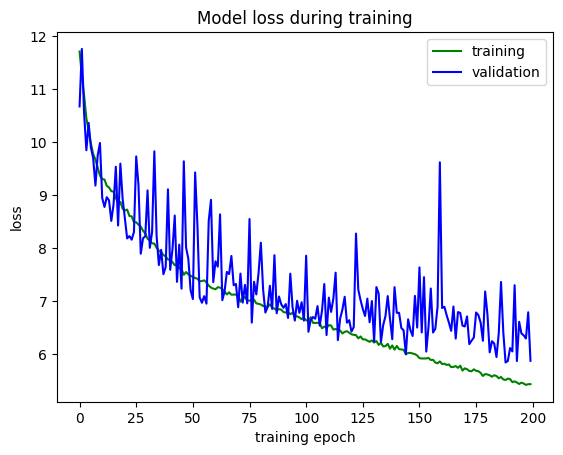

In [70]:
# Plot loss (MSE) for both training and validation split

sns.lineplot(x=history.epoch, y=history.history['loss'], color='g', label='training')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='b', label='validation')
plt.title('Model loss during training')
plt.ylabel('loss')
plt.xlabel('training epoch')
plt.legend(loc='upper right')

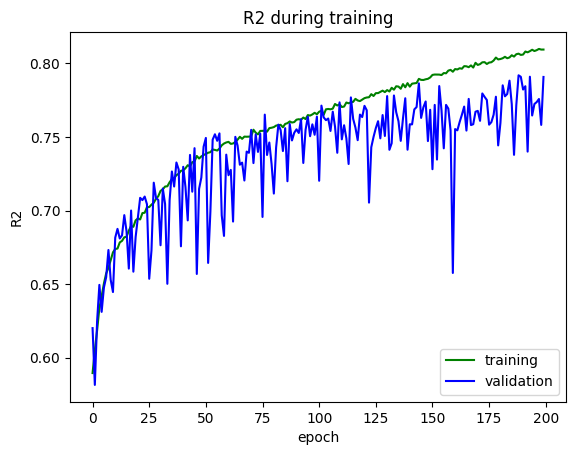

In [71]:
# Plot R2 for both training and validation split

sns.lineplot(x=history.epoch, y=history.history['R2Score'], color='g', label='training')
sns.lineplot(x=history.epoch, y=history.history['val_R2Score'], color='b', label='validation')

plt.title('R2 during training')
plt.ylabel('R2')
plt.xlabel('epoch')
plt.legend(loc='lower right')

#### Evaluate with the independent test set

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MAE: 1.72
R²: 0.81


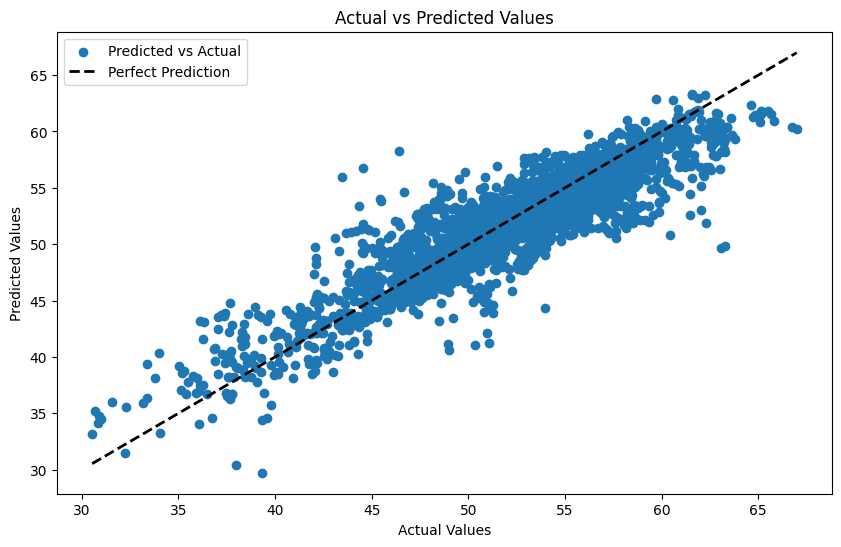

In [72]:
# Make predictions on the test set
y_hat_test = model.predict(X_test_scaled)

# Calculate MAE and R² score
mae = mean_absolute_error(y_test, y_hat_test)
r2 = r2_score(y_test, y_hat_test)

print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# Plotting the test vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_test, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


# AUTOMATE THE PROCESS 

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [74]:
import pandas as pd

# Load the dataset from the Excel file
file_path = r"C:\Users\frm19\OneDrive - Wageningen University & Research\2. Thesis - Information Technology\7. Datasets\drl-minigreenhouse-datasets\compiled-real-and-measurements-datasets-cleaned.xlsx"
mgh_data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
mgh_data.head()

# Drop rows with missing values
# mgh_data = mgh_data.dropna()


,time,co2 in - sim,co2 in - real,temperature in - sim,temperature in - real,rh in - sim,rh in - real,par in - sim,par in - real,time - 2,Unnamed: 10,Unnamed: 11
0,20,395.054803,400.0,20.203483,22.15,75.632258,51.05,3.743976,1.354850,1.0,2024-07-25 00:00:00,1 hr
1,25,394.864415,400.0,20.291022,23.35,78.012618,48.05,3.743976,1.331150,2.0,NaN,NaN
2,30,394.593620,400.0,20.298158,24.15,80.518579,46.05,3.743976,1.323250,3.0,NaN,NaN
3,35,396.130565,400.0,20.103906,24.60,77.168750,44.55,0.000000,0.439635,4.0,NaN,NaN
4,40,397.260265,400.0,20.017797,24.80,78.651062,43.80,0.000000,0.000000,5.0,NaN,NaN


In [75]:
def train_and_evaluate_model(target_variable, _epochs = 100, _batch_size = 10):
    # Select features and target variable
    features = ['time', 'co2 in - sim', 'rh in - sim', 'temperature in - sim', 'par in - sim']
    X = mgh_data[features]
    y = mgh_data[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the ANN model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=_epochs, batch_size=_batch_size, validation_split=0.2, verbose=1)

    # Make predictions on the test set
    y_hat_test = model.predict(X_test_scaled)

    # Calculate MAE and R² score
    mae = mean_absolute_error(y_test, y_hat_test)
    r2 = r2_score(y_test, y_hat_test)

    # print(f"\nTarget Variable: {target_variable}")
    # print(f"MAE: {mae:.2f}")
    # print(f"R²: {r2:.2f}")

    # Plotting the test vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_hat_test, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values for {target_variable}\nMAE: {mae:.2f}, R²: {r2:.2f}')
    plt.legend()
    plt.show()


In [76]:
# List of target variables
target_variables = ['rh in - real', 'temperature in - real', 'par in - real']

# Iterate through each target variable and call the function
for target in target_variables:
    train_and_evaluate_model(target, 200, 20)

Epoch 1/200


c:\Users\frm19\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1297.2012 - val_loss: 65.6577
Epoch 2/200
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 52.2695 - val_loss: 36.6531
Epoch 3/200
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32.6337 - val_loss: 28.3401
Epoch 4/200
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26.6235 - val_loss: 24.8959
Epoch 5/200
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 23.0082 - val_loss: 22.2804
Epoch 6/200
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.1260 - val_loss: 19.4324
Epoch 7/200
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18.5701 - val_loss: 17.3775
Epoch 8/200
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.9448 - val_loss: 15.9095
Epoch 9/200
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.9044 - val_loss: 15.0179
Epoch 10/200
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.3626 - val_loss: 14.2802
Epoch 11/200
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 14.0818 - val_loss: 13.5645
Epoch 12/200
555/555 ━━━━━━

KeyboardInterrupt: 